In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanicdataset-traincsv/train.csv


In [2]:
dataset = pd.read_csv('/kaggle/input/titanicdataset-traincsv/train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
def impute_sex(col):
    Age = col[0]
    Sex = col[1]
    
    if Age <= 12: return 'Child'
    else: return Sex
    

dataset['Sex'] = dataset[['Age','Sex']].apply(impute_sex, axis=1)

In [6]:
dataset['Sex'].value_counts()

male      540
female    282
Child      69
Name: Sex, dtype: int64

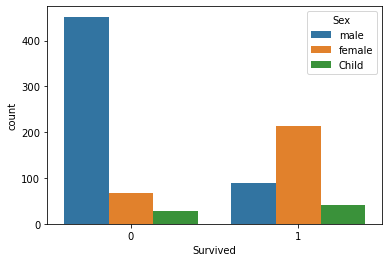

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x= 'Survived', hue='Sex', data=dataset)
plt.show()

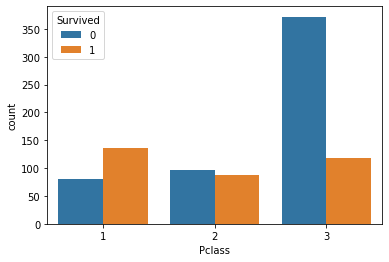

In [8]:
sns.countplot(x= 'Pclass', hue='Survived', data=dataset)
plt.show()

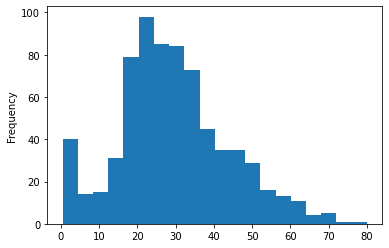

In [9]:
dataset['Age'].plot.hist(bins=20)

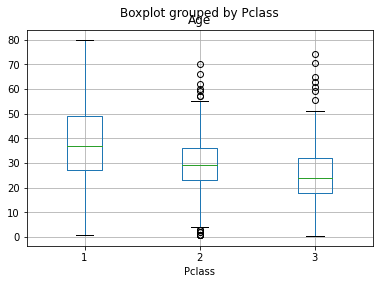

In [10]:
dataset.boxplot(by='Pclass', column=['Age'])

In [11]:
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass ==1 : return 38
        elif Pclass ==2: return 29
        else: return 24
    else: return Age
    

dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age, axis=1)

In [12]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [14]:
one_hot = pd.get_dummies(dataset , columns=['Sex', 'Embarked'], drop_first=True)
one_hot.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,1


In [15]:
x = one_hot.drop(['PassengerId','Survived', 'Name','Ticket','Cabin'], axis=1)
y = one_hot['Survived']

In [16]:
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.3, random_state=101)

In [17]:
print(xtr.shape)
print(xts.shape)

(623, 9)
(268, 9)


In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)
model.fit(xtr, ytr)
ypr = model.predict(xts)
model_score = model.score(xts, yts)

In [19]:
model_score

0.7947761194029851

In [20]:
print(model.predict_proba([xts.iloc[0,:]]))
print(model.predict([xts.iloc[0,:]]))

[[0.71162991 0.28837009]]
[0]


In [21]:
param_grid = [
    {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C' : [0.01, 0.1, 1, 10 ,100],
        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter' : [100, 1000, 5000]
    }
]

In [22]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(model, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
clf.fit(xtr, ytr)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1052 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   31.8s finished
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'max_iter': [100, 1000, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [23]:
clf.best_estimator_

LogisticRegression(C=0.01, penalty='none', solver='newton-cg')

In [24]:
clf.best_score_

0.8298709677419355